In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Specify the new directory path to the RAVDESS dataset on Kaggle
dataset_dir = '/drive/MyDrive/'

paths = []
labels = []

# Walk through the dataset directory
for dirname, _, filenames in os.walk(dataset_dir):
    for filename in filenames:
        # Extract the emotion label from the filename
        label = filename.split('_')[-1]
        # Remove the file extension if it's present
        label = label.split('.')[0].lower()

        # Append the full file path to paths and the extracted label to labels
        paths.append(os.path.join(dirname, filename))
        labels.append(label)

print('Dataset is Loaded')

Dataset is Loaded


In [3]:
len(paths)

0

In [5]:
data, sampling_rate = librosa.load('/content/drive/MyDrive/my Dataset/1/session1/anger/1.1.anger-01.wav')
# /content/drive/MyDrive/my Dataset

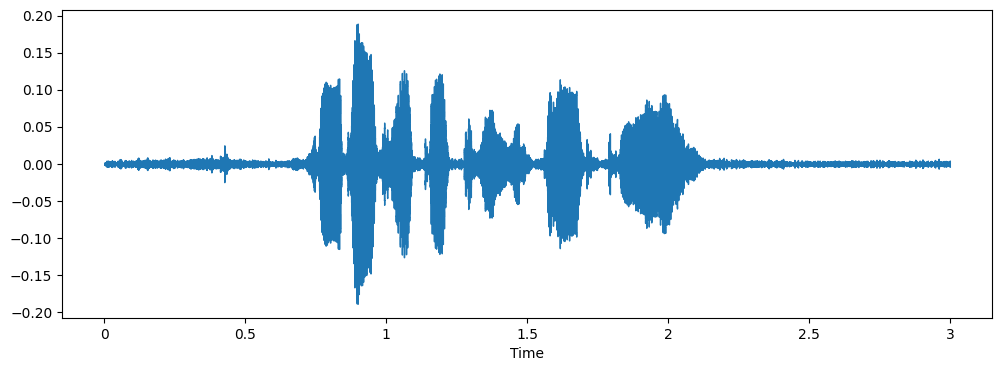

In [6]:
#Plotting the audio file's waveform
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sampling_rate)

In [10]:
import numpy as np
import librosa
import os
from sklearn.model_selection import train_test_split
import glob

# Emotions mapping for the new dataset
int2emotion_new = {
    "anger": "angry",
    "sad": "sad",
    "happy": "happy",
    "neutral": "calm"
}

# Allowed emotions in the dataset
AVAILABLE_EMOTIONS_NEW = set(int2emotion_new.values())

def extract_feature(file_name, mfcc=True, chroma=True, mel=True):
    """
    Extract features from audio file `file_name`
    """
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate

        # Extracting features based on parameters
        if chroma:
            stft = np.abs(librosa.stft(X))
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)

        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)

        if mel:
            mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)

    # Concatenate features into a single array
    feature_vector = np.hstack((mfccs, chroma, mel))

    return feature_vector

def load_data_new(test_size=0.2):
    """
    Load audio data from files and extract features
    """
    X, y = [], []
    dataset_path = '/content/drive/MyDrive/my Dataset/**/*.wav'

    try:
        for file_name in glob.glob(dataset_path, recursive=True):
            emotion_folder = os.path.basename(os.path.dirname(file_name))
            emotion = int2emotion_new.get(emotion_folder)

            if emotion not in AVAILABLE_EMOTIONS_NEW:
                continue

            # Extract features
            features = extract_feature(file_name)

            # Add to data
            X.append(features)
            y.append(emotion)

    except Exception as e:
        print(f"Error: {e}")

    # Split the data into training and testing sets
    return train_test_split(np.array(X), y, test_size=test_size, random_state=7)

# Load and split the data
X_train_new, X_test_new, y_train_new, y_test_new = load_data_new()


In [11]:
print("[+] Number of training samples:", X_train_new.shape[0])
print("[+] Number of testing samples:", X_test_new.shape[0])
print("[+] Number of features:", X_train_new.shape[1])


[+] Number of training samples: 1285
[+] Number of testing samples: 322
[+] Number of features: 180


Accuracy: 0.8043478260869565
Classification Report:
               precision    recall  f1-score   support

       angry       0.81      0.85      0.83        79
        calm       0.84      0.76      0.80        91
       happy       0.70      0.80      0.75        76
         sad       0.89      0.82      0.85        76

    accuracy                           0.80       322
   macro avg       0.81      0.81      0.81       322
weighted avg       0.81      0.80      0.81       322



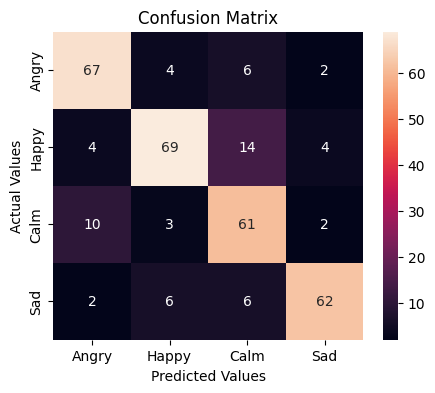

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X_train_new, y_train_new, X_test_new, and y_test_new are defined for the new dataset

# Create RandomForestClassifier object
classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the classifier with X_train_new and y_train_new data
classifier.fit(X_train_new, y_train_new)

# Predict on X_test_new
predictions = classifier.predict(X_test_new)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_true=y_test_new, y_pred=predictions))
print("Classification Report:\n", classification_report(y_test_new, predictions))

# Create and display the confusion matrix
emotions = ["Angry", "Happy", "Calm", "Sad"]
cm = confusion_matrix(y_test_new, predictions)
cm_df = pd.DataFrame(cm, index=emotions, columns=emotions)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


Accuracy: 0.8043478260869565
Classification Report:
               precision    recall  f1-score   support

       angry       0.81      0.86      0.83        79
        calm       0.85      0.74      0.79        91
       happy       0.71      0.80      0.75        76
         sad       0.86      0.83      0.85        76

    accuracy                           0.80       322
   macro avg       0.81      0.81      0.81       322
weighted avg       0.81      0.80      0.80       322



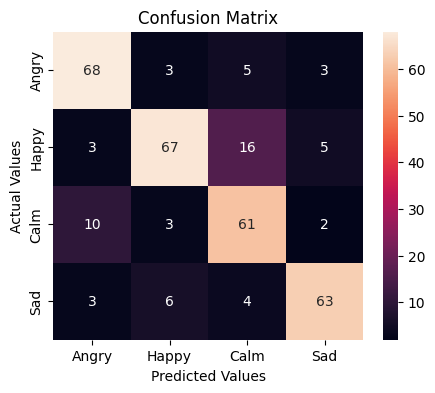

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X_train_new, y_train_new, X_test_new, and y_test_new are defined for the new dataset

# Create RandomForestClassifier object
classifier = RandomForestClassifier(n_estimators=150, random_state=0)

# Fit the classifier with X_train_new and y_train_new data
classifier.fit(X_train_new, y_train_new)

# Predict on X_test_new
predictions = classifier.predict(X_test_new)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_true=y_test_new, y_pred=predictions))
print("Classification Report:\n", classification_report(y_test_new, predictions))

# Create and display the confusion matrix
emotions = ["Angry", "Happy", "Calm", "Sad"]
cm = confusion_matrix(y_test_new, predictions)
cm_df = pd.DataFrame(cm, index=emotions, columns=emotions)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


In [15]:
import joblib
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import librosa

# Function to extract features from an audio file
def extract_feature(file_name, mfcc=True, chroma=True, mel=True):
    with librosa.load(file_name) as audio_data:
        X, sample_rate = audio_data

        if chroma:
            stft = np.abs(librosa.stft(X))
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)

        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)

        if mel:
            mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)

    feature_vector = np.hstack((mfccs, chroma, mel))
    return feature_vector

# Assuming 'X_train_new', 'y_train_new' are already defined from previous training

# Create RandomForestClassifier object
classifier = RandomForestClassifier(n_estimators=150, random_state=0)

# Fit the classifier with X_train_new and y_train_new data
classifier.fit(X_train_new, y_train_new)

# Specify the path to save the model
model_filename = 'rf_model.joblib'

# Save the trained model to a file
joblib.dump(classifier, model_filename)

print(f"RandomForestClassifier model saved to {model_filename}")


RandomForestClassifier model saved to rf_model.joblib


In [30]:
import joblib
import numpy as np
import librosa
import os
from pydub import AudioSegment

# Function to convert MP3 to WAV (required for librosa)
def mp3_to_wav(mp3_path, wav_path):
    sound = AudioSegment.from_mp3(mp3_path)
    sound.export(wav_path, format="wav")

# Function to extract features from an audio file
def extract_feature(file_name, mfcc=True, chroma=True, mel=True):
    X, sample_rate = librosa.load(file_name)

    if chroma:
        stft = np.abs(librosa.stft(X))
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)

    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)

    if mel:
        mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)

    feature_vector = np.hstack((mfccs, chroma, mel))
    return feature_vector

# Load the saved RandomForestClassifier model
model_filename = 'rf_model.joblib'
loaded_model = joblib.load(model_filename)

# Function to predict emotion from an audio file
def predict_emotion(file_name):
    # Convert MP3 to WAV (temporary file)
    wav_path = 'wav_file.wav'
    mp3_to_wav(file_name, wav_path)

    # Extract features from the audio file
    features = extract_feature(wav_path)

    # Reshape features to match the input shape of the RandomForestClassifier
    features = features.reshape(1, -1)  # Reshape to a single sample row

    # Predict emotion using the loaded model
    predicted_emotion = loaded_model.predict(features)[0]

    # Predict probabilities for each class
    prob_scores = loaded_model.predict_proba(features)

    # Remove temporary WAV file
    os.remove(wav_path)

    return predicted_emotion, prob_scores

# Example usage:
audio_file_to_predict = '/content/4.3.sad-08.wav'
predicted_emotion, prob_scores = predict_emotion(audio_file_to_predict)

print("Predicted Emotion:", predicted_emotion)
print("Prediction Scores:")
for emotion, score in zip(loaded_model.classes_, prob_scores[0]):
    print(f"{emotion}: {score:.4f}")


Predicted Emotion: sad
Prediction Scores:
angry: 0.0600
calm: 0.2133
happy: 0.2000
sad: 0.5267
